In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

### Idea

**Cel:** Znaleźć najlepszą linię prostą $y = ax + b$ do danych

**Jak?** Minimalizując sumę **kwadratów odchyleń** punktów od linii

$$\text{Minimalizuj: } SSE = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \sum_{i=1}^{n}(y_i - (ax_i + b))^2$$

gdzie:
- $y_i$ = rzeczywista wartość
- $\hat{y}_i = ax_i + b$ = wartość przewidziana przez model
- $(y_i - \hat{y}_i)$ = **residual** (reszta, błąd)

---

### Dlaczego kwadraty?

✅ **Zalety kwadratów:**
- Błędy dodatnie i ujemne się nie znoszą
- Większe kary za duże odchylenia
- Matematycznie wygodne (funkcja różniczkowalna)
- Rozwiązanie analityczne istnieje!

**Wzory na parametry:**
$$a = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$b = \bar{y} - a\bar{x}$$

slope: 1.88, intercept: 5.13


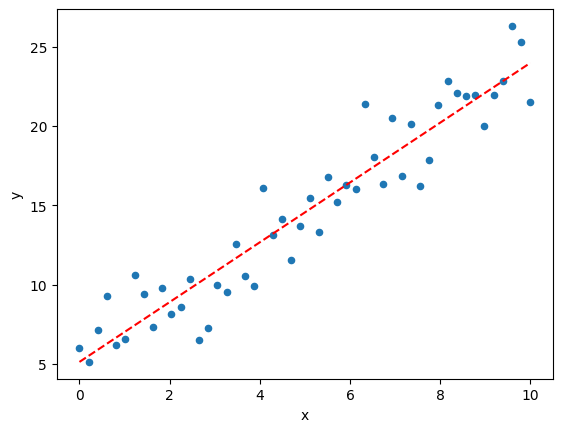

In [ ]:
# Ustawienie seed dla powtarzalności
np.random.seed(42)

# Generowanie danych: y ≈ 2x + 5 + szum
n = 50
x = np.linspace(0, 10, n)
y_true = 2 * x + 5  # prawdziwa zależność
noise = np.random.normal(0, 2, n)  # losowy szum
y = y_true + noise

# Stworzenie DataFrame
data = pd.DataFrame({'x': x, 'y': y})


slope, intercept, r_value, p_value, std_err = stats.linregress(data.x, data.y)
print(f"slope: {slope:.2f}, intercept: {intercept:.2f}")
fig, ax = plt.subplots()
data.plot(kind="scatter", x='x', y='y', ax=ax)
y_linreg = slope*x + intercept
ax.plot(x, y_linreg, 'r--')

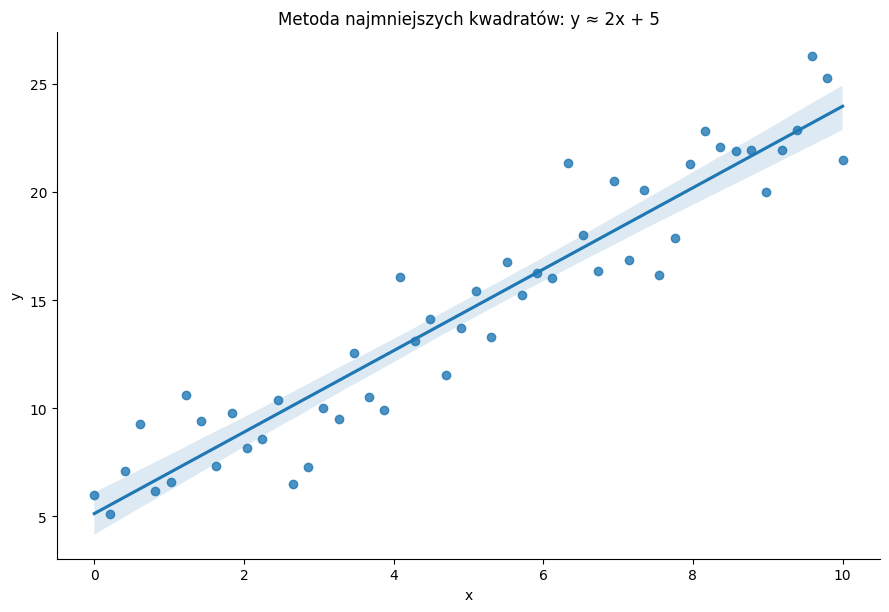

In [ ]:
# Ustawienie seed dla powtarzalności
np.random.seed(42)

# Generowanie danych: y ≈ 2x + 5 + szum
n = 50
x = np.linspace(0, 10, n)
y_true = 2 * x + 5  # prawdziwa zależność
noise = np.random.normal(0, 2, n)  # losowy szum
y = y_true + noise

# Stworzenie DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Wykres z dopasowaniem linii prostej
sns.lmplot(data=data, x='x', y='y', height=6, aspect=1.5)
plt.title('Metoda najmniejszych kwadratów: y ≈ 2x + 5')
plt.show()

# Metoda najmniejszych kwadratów metodą macierzową

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


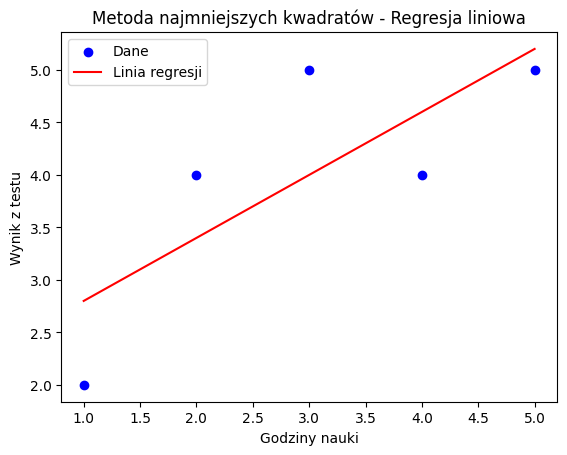

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


📈 Dopasowane parametry prostej:
a (nachylenie) = 2.479
b (przecięcie z osią Y) = 10.358
R² = 0.960


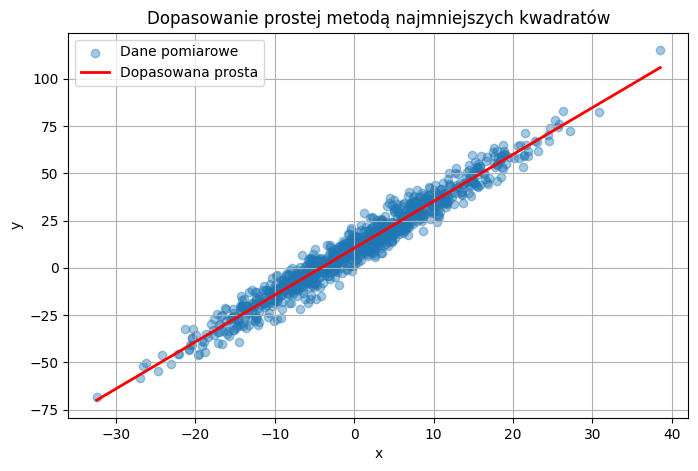

In [1]:
# Zadanie 1 – Regresja liniowa metodą najmniejszych kwadratów

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Wygeneruj dane testowe (1000 punktów)
np.random.seed(42)

# zmienna niezależna x z rozkładu normalnego
x = np.random.normal(0, 10, 1000)

# prawdziwe parametry prostej
a_true = 2.5
b_true = 10

# dodaj szum losowy (również z rozkładu normalnego)
noise = np.random.normal(0, 5, 1000)

# zmienna zależna y (zależność liniowa + szum)
y = a_true * x + b_true + noise

# 2. Dopasuj prostą metodą najmniejszych kwadratów (stats.linregress)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"📈 Dopasowane parametry prostej:")
print(f"a (nachylenie) = {slope:.3f}")
print(f"b (przecięcie z osią Y) = {intercept:.3f}")
print(f"R² = {r_value**2:.3f}")

# 3. Wykres danych i dopasowanej prostej
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.4, label="Dane pomiarowe")
plt.plot(np.sort(x), slope * np.sort(x) + intercept, color="red", linewidth=2, label="Dopasowana prosta")
plt.title("Dopasowanie prostej metodą najmniejszych kwadratów")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

📁 Wybierz plik LungDisease.csv z komputera:


Saving LungDisease.csv to LungDisease.csv

✅ Podgląd danych:
   PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1

📊 Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PEFR      122 non-null    int64
 1   Exposure  122 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB
None

🔍 Brakujące wartości:
PEFR        0
Exposure    0
dtype: int64


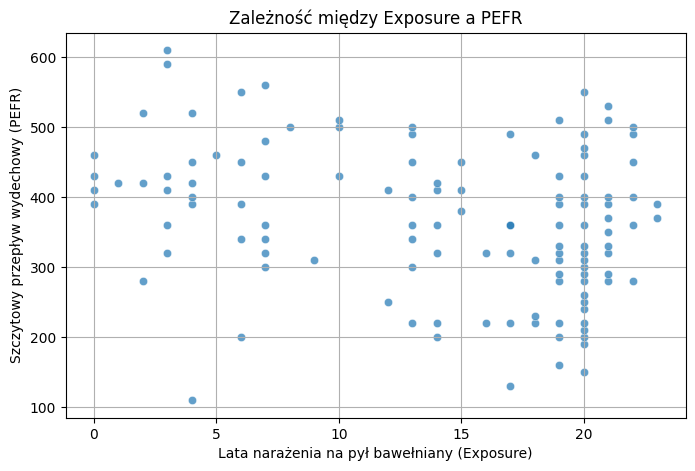


📈 Współczynnik korelacji Pearsona: r = -0.277
p-wartość = 0.00201

📏 Równanie dopasowanej prostej:
PEFR = -4.185 * Exposure + 424.583
Współczynnik determinacji R² = 0.077


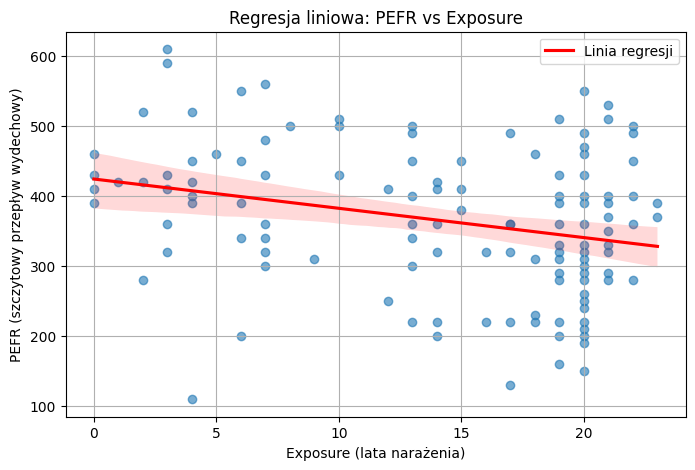


🧩 Wniosek: Trend jest malejący – PEFR maleje wraz z Exposure.
Sprawdź na wykresie, czy występują punkty odstające (outliers).


In [2]:
# 🧠 Zadanie 2 – Analiza zależności między Exposure a PEFR (Google Colab)

# --- Import potrzebnych bibliotek ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files
import os

# --- KROK 1: Wgraj plik z dysku ---
print("📁 Wybierz plik LungDisease.csv z komputera:")
uploaded = files.upload()

# --- KROK 2: Wczytaj dane do DataFrame ---
filename = list(uploaded.keys())[0]  # automatycznie wybiera nazwę pliku
df = pd.read_csv(filename)

print("\n✅ Podgląd danych:")
print(df.head())

print("\n📊 Informacje o danych:")
print(df.info())

# --- KROK 3: Sprawdź brakujące wartości ---
print("\n🔍 Brakujące wartości:")
print(df.isnull().sum())

# --- KROK 4: Wykres punktowy (scatter plot) ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Exposure", y="PEFR", alpha=0.7)
plt.title("Zależność między Exposure a PEFR")
plt.xlabel("Lata narażenia na pył bawełniany (Exposure)")
plt.ylabel("Szczytowy przepływ wydechowy (PEFR)")
plt.grid(True)
plt.show()

# --- KROK 5: Oblicz współczynnik korelacji Pearsona ---
corr, p_value = stats.pearsonr(df["Exposure"], df["PEFR"])
print(f"\n📈 Współczynnik korelacji Pearsona: r = {corr:.3f}")
print(f"p-wartość = {p_value:.5f}")

# --- KROK 6: Dopasuj prostą regresji liniowej ---
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Exposure"], df["PEFR"])
print(f"\n📏 Równanie dopasowanej prostej:")
print(f"PEFR = {slope:.3f} * Exposure + {intercept:.3f}")
print(f"Współczynnik determinacji R² = {r_value**2:.3f}")

# --- KROK 7: Wykres z linią regresji ---
plt.figure(figsize=(8,5))
sns.regplot(
    data=df, x="Exposure", y="PEFR",
    scatter_kws={"alpha":0.6},
    line_kws={"color":"red", "label":"Linia regresji"}
)
plt.title("Regresja liniowa: PEFR vs Exposure")
plt.xlabel("Exposure (lata narażenia)")
plt.ylabel("PEFR (szczytowy przepływ wydechowy)")
plt.legend()
plt.grid(True)
plt.show()

# --- KROK 8: Prosty opis trendu ---
if corr > 0:
    trend = "rosnący – PEFR zwiększa się wraz z Exposure."
elif corr < 0:
    trend = "malejący – PEFR maleje wraz z Exposure."
else:
    trend = "brak wyraźnej zależności."

print(f"\n🧩 Wniosek: Trend jest {trend}")
print("Sprawdź na wykresie, czy występują punkty odstające (outliers).")


# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



📁 Wybierz plik anscombe.csv z komputera:


Saving anscombe (1).csv to anscombe (1) (1).csv

✅ Podgląd danych:
     x1    y1    x2    y2    x3     y3   x4    y4
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47


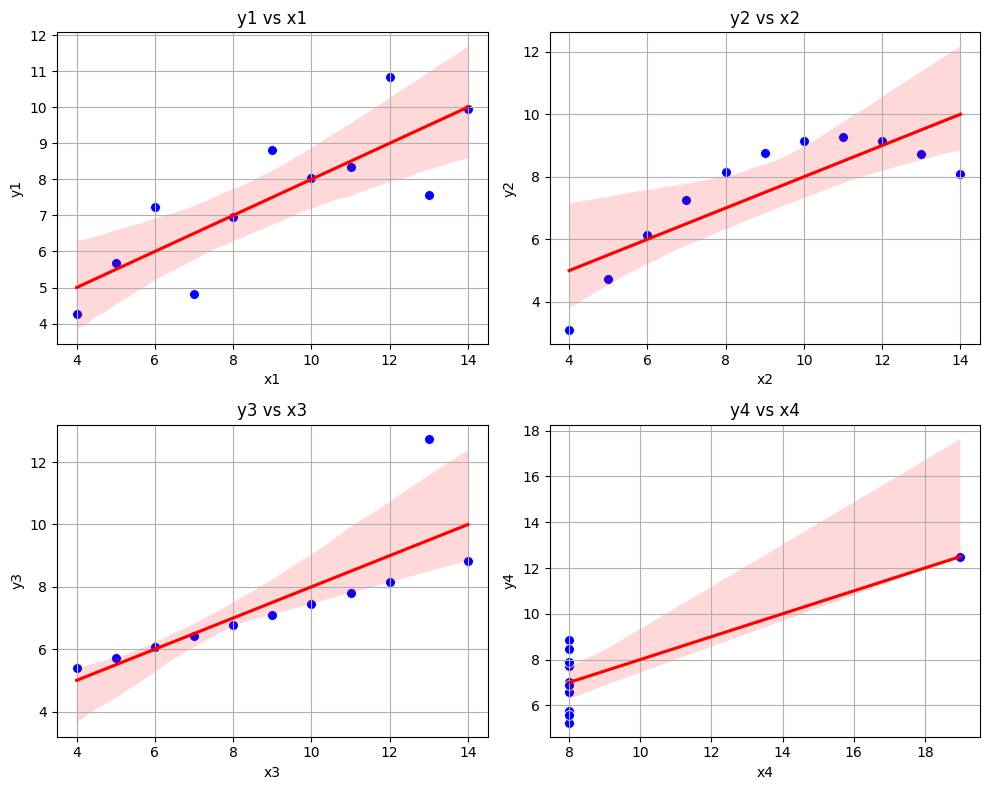


📈 Wyniki regresji i korelacji dla każdej pary:

y1 = 0.500 * x1 + 3.000
  → R² = 0.667, r = 0.816, SE = 0.118, p = 0.0022

y2 = 0.500 * x2 + 3.001
  → R² = 0.666, r = 0.816, SE = 0.118, p = 0.0022

y3 = 0.500 * x3 + 3.002
  → R² = 0.666, r = 0.816, SE = 0.118, p = 0.0022

y4 = 0.500 * x4 + 3.002
  → R² = 0.667, r = 0.817, SE = 0.118, p = 0.0022



In [4]:
# 🧠 Zadanie 3 – Anscombe’s quartet (poprawiona wersja)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files

# --- KROK 1: Wgraj plik anscombe.csv ---
print("📁 Wybierz plik anscombe.csv z komputera:")
uploaded = files.upload()

# --- KROK 2: Wczytaj dane (pomijamy pierwszy wiersz nagłówków) ---
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, header=1)

# --- Nazwij kolumny poprawnie ---
df.columns = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]

print("\n✅ Podgląd danych:")
print(df.head())

# --- KROK 3: Wykresy punktowe ---
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
pairs = [("x1", "y1"), ("x2", "y2"), ("x3", "y3"), ("x4", "y4")]

for i, (x, y) in enumerate(pairs):
    sns.scatterplot(ax=axes[i], x=df[x], y=df[y], color="blue", s=50)
    sns.regplot(ax=axes[i], x=df[x], y=df[y], scatter=False, color="red")
    axes[i].set_title(f"{y} vs {x}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# --- KROK 4: Regresja liniowa i korelacja ---
print("\n📈 Wyniki regresji i korelacji dla każdej pary:\n")

for x, y in pairs:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[y])
    print(f"{y} = {slope:.3f} * {x} + {intercept:.3f}")
    print(f"  → R² = {r_value**2:.3f}, r = {r_value:.3f}, SE = {std_err:.3f}, p = {p_value:.4f}\n")
